In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import DataGenerator, DataPlotter

np.random.seed(42)

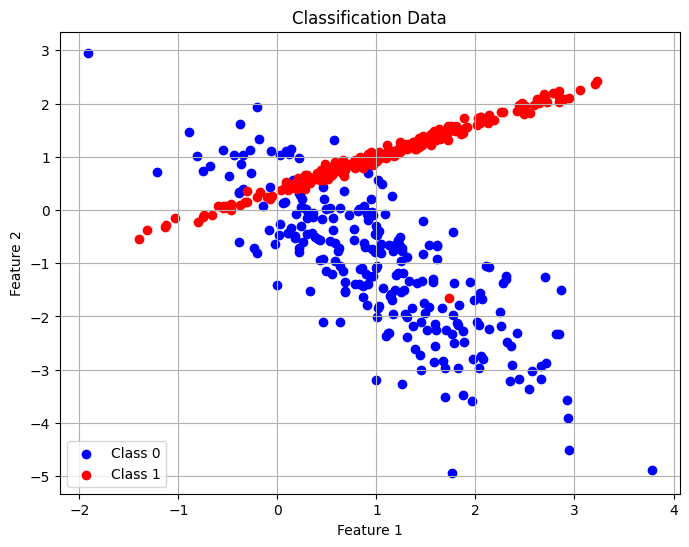

In [2]:
num_samples = 500
num_features = 2

type = "regression"
type = "classification"

if type == "classification":
    num_classes = 2

gen = DataGenerator(num_samples, num_features, num_classes)
X,y = gen.get_data(type=type)
initial = X.copy()

plotter = DataPlotter()
plotter.plot_data(X,y, type, num_classes)


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(self, x):
    return sigmoid(x) * (1 - sigmoid(x))

def sign(X):
    return np.sign(X)

def relu(X):
    return np.maximum(X,0)


def relu_deriv(X):
    return X > 0

def softmax(X):
    return np.exp(X) / sum(np.exp(X))

def unit_step_func(X):
    return np.where(X > 0 , 1, 0)


## Works for binary classification, yet

In [4]:
num_samples, num_features = X.shape

w = np.ones(num_features)
b = 0
learning_rate = 0.01
max_iter = 1000
activation = unit_step_func

y_ = activation(y)

for _ in range(max_iter):
    for idx, xi in enumerate(X):
        y_predict_linear = np.dot(xi,w) + b
        y_predict = activation(y_predict_linear) # activation
        error = (y_[idx] - y_predict)
        w += learning_rate*error*xi
        b += learning_rate*error


In [7]:
def predict(X):
    y_predict_linear = np.dot(X,w) + b
    y_predict = activation(y_predict_linear)
    return y_predict

predictions = predict(X)

In [8]:
from sklearn.metrics import accuracy_score, f1_score
  
# accuracy_score(y_, predictions)
f1_score(y_, predictions)

0.8844036697247707